
# Workshop 02:
---
##### Concepts:
- Basic Python
    - Loops, Dict, functions, Packages
- Read & Write Text files
    - Csv file, Text file
    - Loop inside a Folder
- explore some packages
    


### Part 1
---    

Metric collector - #cpu #memory usage percentage
---

1. Run some function Every 30 Second
2. The function is to collect cpu, mem usage (percentage) of your machine.
3. Save the metrics into a csv file..

*Find & explore package in `pypi.org` that gives `cpu`, `memory` percentage...*


In [50]:
from datetime import datetime
str(datetime.now()).split()[0]

'2020-02-14'

In [51]:
# code here

SECONDS_TO_WAIT =10
from time import sleep
import psutil
from datetime import datetime
import csv

def collect_metric():
    """
    Input: N/a
    Output: Return 
    Tuple: (cpu, mem, timestamp)
    """
    
    cpu = psutil.cpu_percent()
    mem = psutil.virtual_memory().percent
    timestamp = str(datetime.now())

    row_tpl = (cpu, mem, timestamp)
    return row_tpl

def save_metric_to_csv(fname, row, mode="a"):
    """
    Input: cpu,mem,timestamp
        fname: file_path/location to the file.. *.csv
        row  : tuple (?, ? , ?)
               list  [?, ? , ?]
               Example: (10,20,'2020-02-12')
    Output: None
    """
    #newline="" is to fix windows extra new lines bug when using csv module
    with open(fname, mode=mode, newline="" ) as f:
        csv_writer = csv.writer(f)
        csv_writer.writerow ( row )

date = str(datetime.now()).split()[0]
fname = f"cpu_mem_{date}.csv"
header_row =  ('cpu','mem','timestamp')
save_metric_to_csv(fname, header_row, mode="w")

try:
    while True:
        
        row = collect_metric() #(10,20,"2020-02-12 18:54:43.464747")
        
        save_metric_to_csv(fname, row) #save the row to the file
        sleep(SECONDS_TO_WAIT) #wait for 10
        
except KeyboardInterrupt:
    print("Stopping the loop....")

Stopping the loop....


In [5]:
row = collect_metric()
save_metric_to_csv("cpu_mem.csv", row)

#### Test your implementation with the following code

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv(fname)
df.head()

cpu   mem                   timestamp
0  11.4  43.3  2020-02-14 19:55:52.386561
1  18.5  43.6  2020-02-14 19:56:02.387650
2  17.3  43.5  2020-02-14 19:56:12.387789
3  21.7  43.7  2020-02-14 19:56:22.390487
4  17.5  43.5  2020-02-14 19:56:32.391569

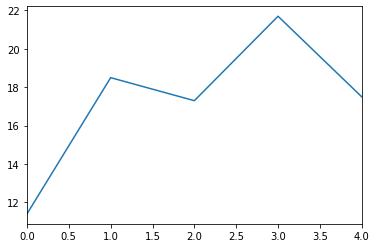

In [53]:
df.cpu.plot()

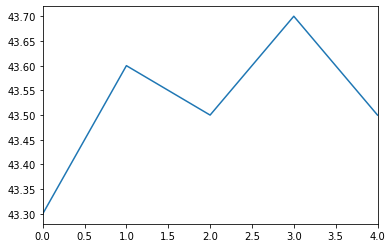

In [54]:
df.mem.plot()

(8.1, 43.2, '2020-02-14 19:52:30.471223')

## END